<a href="https://colab.research.google.com/github/AnasBakr/Ml-projects-/blob/main/factor_anal.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#First here we imported the necessary libraries for our project
import pandas as pd
import matplotlib.pyplot as plt
from factor_analyzer.factor_analyzer import calculate_bartlett_sphericity
from factor_analyzer.factor_analyzer import calculate_kmo
from factor_analyzer import FactorAnalyzer


In [ ]:
#Here we have read the data set as data frame to clean it and explore it properly
data_set = pd.read_csv('/content/FactorAnalysis.csv')

In [ ]:
#We get the dimensions of the data
data_set.shape

(57, 12)

In [ ]:
#Here we get the first several columns from our data set to understand it more
data_set.head()

,Academic record,Appearance,Communication,Company Fit,Experience,Job Fit,Letter,Likeability,Organization,Potential,Resume,Self-Confidence
0,6.0,8.0,7.0,5.0,6.0,5.0,7.0,7.0,7.0,6.0,7.0,7.0
1,9.0,8.0,8.0,8.0,10.0,9.0,8.0,9.0,8.0,9.0,9.0,9.0
2,6.0,7.0,7.0,6.0,6.0,7.0,7.0,8.0,8.0,6.0,6.0,8.0
3,7.0,8.0,6.0,5.0,8.0,5.0,9.0,8.0,7.0,8.0,7.0,7.0
4,4.0,7.0,8.0,6.0,6.0,6.0,6.0,7.0,8.0,5.0,4.0,6.0


In [ ]:
#Here we asked if there are any duplicated
data_set.duplicated().sum()

3

In [ ]:
#Here we asked if there are any null values in the data set
data_set.isnull().sum()

Academic record    2
Appearance         2
Communication      1
Company Fit        2
Experience         3
Job Fit            1
Letter             1
Likeability        1
Organization       1
Potential          1
Resume             1
Self-Confidence    1
dtype: int64

In [ ]:
#Here we drop the duplicated
data_set.drop_duplicates(inplace=True)

In [ ]:
#Here we drop the null values
data_set.dropna(inplace=True)

In [ ]:
#here we checked the dimensions again of our data set
data_set.shape

(50, 12)

In [ ]:
#Here are some statistical facts about our data set
data_set.describe()

,Academic record,Appearance,Communication,Company Fit,Experience,Job Fit,Letter,Likeability,Organization,Potential,Resume,Self-Confidence
count,50.000000,50.00000,50.000000,50.000000,50.000000,50.000000,50.000000,50.000000,50.000000,50.00000,50.000000,50.000000
mean,7.400000,7.44000,6.860000,6.880000,7.320000,7.020000,7.220000,7.380000,6.860000,7.30000,7.240000,7.340000
std,1.293626,1.01338,1.470943,1.624305,1.361871,1.597064,1.669535,1.122861,1.578038,1.38873,1.684988,1.171254
min,4.000000,5.00000,3.000000,3.000000,5.000000,3.000000,4.000000,4.000000,3.000000,4.00000,4.000000,5.000000
25%,6.250000,7.00000,6.000000,6.000000,6.000000,6.000000,6.000000,7.000000,5.250000,6.00000,6.000000,7.000000
50%,7.000000,7.50000,7.000000,7.000000,7.000000,7.000000,7.000000,7.500000,7.000000,7.50000,7.000000,7.000000
75%,8.000000,8.00000,8.000000,8.000000,8.000000,8.000000,8.000000,8.000000,8.000000,8.00000,9.000000,8.000000
max,10.000000,10.00000,10.000000,10.000000,10.000000,10.000000,10.000000,9.000000,9.000000,10.00000,10.000000,9.000000


In [ ]:
#Here we know the columns data type and check if it is numerical to procced
data_set.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 50 entries, 0 to 56
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Academic record  50 non-null     float64
 1   Appearance       50 non-null     float64
 2   Communication    50 non-null     float64
 3   Company Fit      50 non-null     float64
 4   Experience       50 non-null     float64
 5   Job Fit          50 non-null     float64
 6   Letter           50 non-null     float64
 7   Likeability      50 non-null     float64
 8   Organization     50 non-null     float64
 9   Potential        50 non-null     float64
 10  Resume           50 non-null     float64
 11  Self-Confidence  50 non-null     float64
dtypes: float64(12)
memory usage: 5.1 KB


In [ ]:
#Here we preform Bartlett’s test of sphericity
#To checks whether or not the observed variables intercorrelate
chi_square_value, p_value = calculate_bartlett_sphericity (data_set)
chi_square_value, p_value

(472.514673149833, 9.677847001339864e-63)

In [ ]:
#Here we preform the Kaiser-meyer-olkin (kmo) test to measure the suitability of data for factor analysis
#if the Value of KMO less than 0.6 is considered inadequate but it is not in our data set
kmo_all, kmo_model = calculate_kmo (data_set)
kmo_model

0.7979087431160229

In [ ]:
#Here we preform the factor analysis with 12 factors and get the eigen values and apparently
#we will consider only 4 factors because the rest is less than 1
fa = FactorAnalyzer()
fa.set_params(n_factors=12, rotation=None)
fa.fit(data_set)
# Check Eigenvalues
ev, v = fa.get_eigenvalues()
ev

array([6.3876438 , 1.48846472, 1.10447808, 1.05164512, 0.63250779,
       0.36695649, 0.30158363, 0.21291441, 0.15571561, 0.13792457,
       0.08512934, 0.07503646])

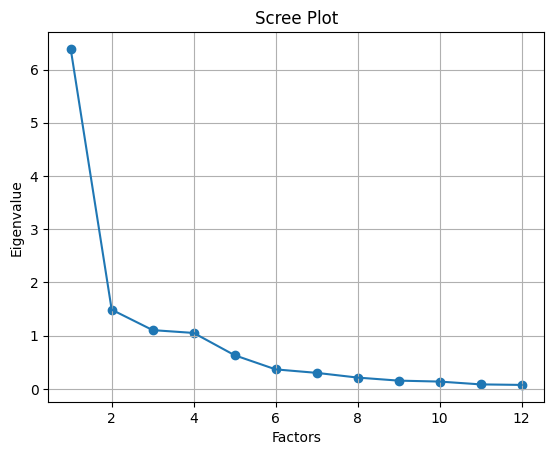

In [ ]:
plt.scatter (range(1, data_set.shape[1]+1), ev)
plt.plot(range (1, data_set.shape[1]+1), ev)
plt.title('Scree Plot')
plt.xlabel('Factors')
plt.ylabel('Eigenvalue')
plt.grid()
plt.show()

#And this scree plot confirming our conclusion

In [ ]:
#Here we preform the factor analysis with 4 factors like we concluded and with the varimax rotation which used to simplify
#the factor structure and make it easier to interpret and we displayed the factors  loading matrix

fa.set_params(n_factors=4, rotation="varimax")
fa.fit(data_set)
fa.loadings_

array([[ 0.71312588,  0.17775848,  0.26882756,  0.15419691],
       [ 0.23017788,  0.27211729,  0.70427538,  0.17133765],
       [ 0.11711306,  0.76015842,  0.30918698,  0.20776511],
       [ 0.52123502,  0.65152757,  0.15136201,  0.18747849],
       [ 0.73240466, -0.03203943,  0.18046587,  0.3274356 ],
       [ 0.61417633,  0.53126921,  0.17000674,  0.20644763],
       [ 0.22271967,  0.24308124,  0.05894598,  0.90429038],
       [ 0.22613827,  0.32131897,  0.68825186,  0.18486431],
       [ 0.09264632,  0.84350138,  0.35964436,  0.08720645],
       [ 0.85468132,  0.2566218 ,  0.28469424,  0.11846164],
       [ 0.28605746,  0.12928771,  0.33097405,  0.80247624],
       [ 0.27292781,  0.21004035,  0.81561015,  0.08543013]])

In [ ]:
#Here we calculated the variance of each factor in the factor analysis model.

fa.get_factor_variance()

(array([2.75668545, 2.39176437, 2.21057321, 1.80610295]),
 array([0.22972379, 0.1993137 , 0.18421443, 0.15050858]),
 array([0.22972379, 0.42903748, 0.61325192, 0.7637605 ]))

In [ ]:
#Over all we have concluded that this 4 factors could describe our original 12 Observed variables
# The factor analysis is a method of dimension reduction and getting the latent variables  .